# Defining Laser Modulation

In [1]:
from AMS_BP.configio.configmodels import CellParameters

"""
cell_space = [x_min, x_max, y_min, y_max, z_min, z_max] #um
"""
cellp = CellParameters(cell_type="RectangularCell",params = {"bounds":[4, 7, 3, 9,-0.5,0.5]})


In [2]:
from AMS_BP.configio.convertconfig import make_cell

rcell = make_cell(cellp)
print(
    rcell
)  # z=0 is always the origin. origin + dimensions = x_max, y_max, z_range. z_range = 2 * | cell_axial_radius |

RectangularCell(mesh=PolyData (0x14ee42680)
  N Cells:    12
  N Points:   8
  N Strips:   0
  X Bounds:   4.000e+00, 7.000e+00
  Y Bounds:   3.000e+00, 9.000e+00
  Z Bounds:   -5.000e-01, 5.000e-01
  N Arrays:   2, bounds=[4, 7, 3, 9, -0.5, 0.5])


In [3]:
from AMS_BP.configio.configmodels import MoleculeParameters

num_molecules = [10000]  
track_type = [
    "constant",
]  
allow_transition_probability = [
    False,
]  

diffusion_coefficient = [
    [
        0.0,
        0.0,
    ],
]  
diffusion_track_amount = [
    [
        0.5,
        0.5,
    ],
]  
hurst_exponent = [
    [
        0.5,
        0.5,
    ],

]  
hurst_track_amount = [
    [
        0.5,
        0.5,
    ],

]  # same structure as diffusion_track_amount.

diffusion_transition_matrix = [
    [
        [
            0.992,
            0.008,
        ],
        [
            0.0273,
            0.9727,
        ],
    ],

]  # transition matrix for diffusion coefficients. For a particular molecule type, the probability of transitioning from one diffusion coefficient to another is given by the transition matrix. The size of the matrix is the number of diffusion coefficients for that molecule type. The rows are the current diffusion coefficient and the columns are the new diffusion coefficient.
hurst_transition_matrix = [
    [
        [
            0.992,
            0.008,
        ],
        [
            0.0273,
            0.9727,
        ],
    ],

]  # same as diffusion_transition_matrix but  for hurst exponents.
transition_matrix_time_step = [
    20,
]  # the time step at which the probabilities for the transition matrices are defined. In units of milliseconds.


In [4]:
# combine it into one data structure
molecule_parameters = MoleculeParameters(
    num_molecules=num_molecules,
    track_type=track_type,
    diffusion_coefficient=diffusion_coefficient,
    state_probability_diffusion=diffusion_track_amount,
    hurst_exponent=hurst_exponent,
    state_probability_hurst=hurst_track_amount,
    allow_transition_probability=allow_transition_probability,
    transition_matrix_time_step=transition_matrix_time_step,
    diffusion_transition_matrix=diffusion_transition_matrix,
    hurst_transition_matrix=hurst_transition_matrix,
)
print(molecule_parameters)

num_molecules=[10000] track_type=['constant'] diffusion_coefficient=array([[0., 0.]]) hurst_exponent=array([[0.5, 0.5]]) allow_transition_probability=[False] transition_matrix_time_step=[20] diffusion_transition_matrix=array([[[0.992 , 0.008 ],
        [0.0273, 0.9727]]]) hurst_transition_matrix=array([[[0.992 , 0.008 ],
        [0.0273, 0.9727]]]) state_probability_diffusion=array([[0.5, 0.5]]) state_probability_hurst=array([[0.5, 0.5]])


In [5]:
sample_plane_dim = [
    10,
    10,
]  # in um. Describes the size of the plane on which the sample is placed.
cycle_count = 100  # Number of cycles to run the simulation for. (this would be the # of frames in a movies if a time series)
# cycle_count is 1 for each exposure_time + interval_time in the simulation.
exposure_time = 20  # in ms
interval_time = 0  # in ms
oversample_motion_time = 10  # this is the smallest time step in the simulation for the motion of the molecules. Both the exposure_time and interval_time need to be equal to or larger than this, or be 0.

from AMS_BP.configio.convertconfig import GlobalParameters

globalp = GlobalParameters(
    sample_plane_dim=sample_plane_dim,
    cycle_count=cycle_count,
    exposure_time=exposure_time,
    interval_time=interval_time,
    oversample_motion_time=oversample_motion_time,
)
print(globalp)

sample_plane_dim=array([10., 10.]) cycle_count=100 exposure_time=20 interval_time=0 oversample_motion_time=10


In [6]:
initial_centers = [
    [
        [
            5.5,
            5,
            0.05,
        ],
        [
            5,
            7,
            -0.15,
        ],
    ],
] # first dimension is the types of molecules. (see num_molecules) For each type there can be any number of condensates with centers [x,y,z]
initial_scale = [ [0.26, 0.26]] # um
diffusion_coefficient = [ [0, 0]] # um^2/s
hurst_exponent = [ [0.2, 0.2]]
density_dif = [ 10] # density of the condensate vs the background.

from AMS_BP.configio.convertconfig import CondensateParameters
condp = CondensateParameters(
    initial_centers=initial_centers,
    initial_scale=initial_scale,
    diffusion_coefficient=diffusion_coefficient,
    hurst_exponent=hurst_exponent,
    density_dif=density_dif,
)
print(condp)

initial_centers=[[[5.5, 5.0, 0.05], [5.0, 7.0, -0.15]]] initial_scale=[[0.26, 0.26]] diffusion_coefficient=[[0.0, 0.0]] hurst_exponent=[[0.2, 0.2]] density_dif=[10]


In [7]:
from AMS_BP.configio.convertconfig import OutputParameters
outp = OutputParameters(
    output_path = "blah/blahblah",
    output_name = "datamoviename",
    subsegment_type = "any_string",
    subsegment_number = 1, # any integer
)

In [8]:
from AMS_BP.configio.convertconfig import ConfigList
config_list = ConfigList(
    CellParameters = cellp,
    MoleculeParameters = molecule_parameters,
    GlobalParameters = globalp,
    CondensateParameters = condp,
    OutputParameters = outp,
)

In [9]:
num_of_fluorophores = 1
fluorophore_names = ["PAmCherry"]


In [10]:
from AMS_BP.sample.flurophores.flurophore_schema import Fluorophore, State, StateTransition, SpectralData
# PAmCherry
pamcherry_f = {
    "name" : 'PAmCherry',
    "initial_state" : "dark", # must be one of the defined states below.
}
bright_state = State(
            name = "bright",
            state_type = "fluorescent", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = 0.46, # unitless; 0-1
            extinction_coefficient_lambda_val = 18000, # in M^-1 cm^-1
            fluorescent_lifetime = 0.000000001, # in seconds
            excitation_spectrum = SpectralData(
                    wavelengths = [310.0, 311.0, 411.0, 511.0, 611.0, 612.0], # in nm
                    intensities = [0.00, 0.047, 0.0043, 0.6, 0.06, 0.00], # in arbitrary units
                ),
            emission_spectrum = SpectralData(
                    wavelengths = [530.0, 529.0, 600.0, 650.0, 700.0, 797.0, 799.0], # in nm
                    intensities = [0.00, 0.02, 0.98, 0.28, 0.05, 0.003, 0.00], # in arbitrary units
                ),
            )
dark_state = State(
            name = "dark",
            state_type = "dark", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
triplet_state = State(
            name = "triplet",
            state_type = "dark", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
bleached_state = State(
            name = "bleached",
            state_type = "bleached", # one of "fluorescent" or "dark" or "bleached"
            quantum_yield_lambda_val = None,
            extinction_coefficient_lambda_val = None,
            fluorescent_lifetime = None,
            excitation_spectrum = None,
            emission_spectrum = None,
            )
transition_DtB = StateTransition(
    from_state = "dark",
    to_state = "bright",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [308.0, 309.0, 359.0, 403.0, 440.0, 484.0, 485.0], # in nm
        intensities = [0.00, 0.04, 0.11, 1.0, 0.07, 0.0004, 0.00], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 6500,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,                
    )
transition_BtB = StateTransition(
    from_state = "bright",
    to_state = "bleached",
    photon_dependent = True,
    spectrum = SpectralData(
        wavelengths = [310.0, 311.0, 411.0, 511.0, 611.0, 612.0], # in nm
        intensities = [0.00, 0.047, 0.0043, 0.6, 0.06, 0.00], # in arbitrary units
        ),
    extinction_coefficient_lambda_val = 18000,                                   # M^-1 cm^-1
    quantum_yield = 0.000005,
    )

transition_BtT = StateTransition(
    from_state = "bright",
    to_state = "triplet",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transition_TtD = StateTransition(
    from_state = "triplet",
    to_state = "dark",
    photon_dependent = False,
    base_rate = 1, #1/s
    spectrum = None,
    extinction_coefficient = None,
    quantum_yield = None,
    )
transitions = {
    "dark_bright" : transition_DtB,
    "bright_bleached" : transition_BtB,
    "bright_triplet" : transition_BtT,
    "triplet_dark" : transition_TtD,
}
# fluorophore definition
fpamcherry = Fluorophore(
    name = pamcherry_f['name'],
    initial_state = dark_state,
    states = {
        "bright" : bright_state,
        "dark" : dark_state,
        "triplet" : triplet_state,
        "bleached" : bleached_state,
        },
    transitions = transitions,
    )
print(fpamcherry)

name='PAmCherry' states={'bright': State(name='bright', state_type=<StateType.FLUORESCENT: 'fluorescent'>, excitation_spectrum=SpectralData(wavelengths=[310.0, 311.0, 411.0, 511.0, 611.0, 612.0], values=[0.0, 0.047, 0.0043, 0.6, 0.06, 0.0], cache_values={310.0: 0.0, 311.0: 0.047, 411.0: 0.0043, 511.0: 0.6, 611.0: 0.06, 612.0: 0.0}), emission_spectrum=SpectralData(wavelengths=[530.0, 529.0, 600.0, 650.0, 700.0, 797.0, 799.0], values=[0.0, 0.02, 0.98, 0.28, 0.05, 0.003, 0.0], cache_values={530.0: 0.0, 529.0: 0.02, 600.0: 0.98, 650.0: 0.28, 700.0: 0.05, 797.0: 0.003, 799.0: 0.0}), quantum_yield_lambda_val=0.46, quantum_yield=WavelengthDependentProperty(wavelengths=[530.0, 529.0, 600.0, 650.0, 700.0, 797.0, 799.0], values=[0.0, 0.009387755102040816, 0.46, 0.13142857142857145, 0.023469387755102045, 0.0014081632653061226, 0.0], cache_values={530.0: 0.0, 529.0: 0.009387755102040816, 600.0: 0.46, 650.0: 0.13142857142857145, 700.0: 0.023469387755102045, 797.0: 0.0014081632653061226, 799.0: 0.0}

In [11]:
# Quantum efficiency curve (wavelength in nm : efficiency 0-1)
# extrapotation for wavelengths not included uses edge values
quantum_efficiency = [
    [
        399,
        0.00,
    ],
    [
        400,
        0.80,
    ],
    [
        500,
        0.90,
    ],
    [
        600,
        0.95,
    ],
    [
        700,
        0.90,
    ],
    [
        800,
        0.70,
    ],
    [
        900,
        0.40,
    ],
    [
        901,
        0.00,
    ],
]
wavelength_qe = {pair[0]: pair[1] for pair in quantum_efficiency}


from AMS_BP.optics.camera.quantum_eff import QuantumEfficiency
quantum_efficiency = QuantumEfficiency(wavelength_qe=wavelength_qe)
print(quantum_efficiency)

QuantumEfficiency(wavelength_qe={399: 0.0, 400: 0.8, 500: 0.9, 600: 0.95, 700: 0.9, 800: 0.7, 900: 0.4, 901: 0.0}, _cached_wavelength_qe={399: 0.0, 400: 0.8, 500: 0.9, 600: 0.95, 700: 0.9, 800: 0.7, 900: 0.4, 901: 0.0})


In [12]:
from AMS_BP.optics.camera.detectors import CMOSDetector
pixel_count = [190, 190]  # [width, height], 1200x1200 (x pixel_size)
pixel_detector_size = 6.5 # um
magnification = 100
dark_current = 0.0005     # electrons/pixel/second
readout_noise = 1.6       # electrons RMS
bit_depth = 16
sensitivity = 1.0         # electrons/ADU
base_adu = 100            #ADU
binning_size = 1          # 1x1 , if 2 then 2x2
detector = CMOSDetector(
    pixel_count=pixel_count,
    pixel_detector_size=pixel_detector_size,
    magnification=magnification,
    dark_current=dark_current,
    readout_noise=readout_noise,
    bit_depth=bit_depth,
    sensitivity=sensitivity,
    base_adu=base_adu,
    binning_size=binning_size,
    pixel_size = pixel_detector_size/magnification,
)
print(detector)

In [13]:
from AMS_BP.optics.psf.psf_engine import PSFEngine, PSFParameters
from typing import Optional

params_config = {
    "numerical_aperture": 1.4,
    "refractive_index": 1.0,
    # "pinhole_diameter": 0.002, # do not include is no pinhole.
}


def make_psf(params_config: dict, pixel_size: int | float) -> PSFEngine:
    def Partial_PSFengine(
                wavelength: int | float, z_step: Optional[int | float] = None
            ):
                # Create PSFParameters instance
                parameters = PSFParameters(
                    emission_wavelength=wavelength,
                    numerical_aperture=float(params_config["numerical_aperture"]),
                    pixel_size=pixel_size,
                    z_step=float(params_config["z_step"]) if z_step is None else z_step,
                    refractive_index=float(params_config.get("refractive_index", 1.0)),
                    pinhole_diameter=params_config.get("pinhole_diameter", None),
                )

                # Create PSF engine
                psf_engine = PSFEngine(parameters)
                return psf_engine
    return Partial_PSFengine
psf_generator = make_psf(params_config, pixel_size=(pixel_detector_size/magnification))
print(psf_generator)

<function make_psf.<locals>.Partial_PSFengine at 0x14ee16a20>


In [14]:
from AMS_BP.optics.filters.channels.channelschema import Channels
from AMS_BP.optics.filters.filters import create_allow_all_filter, create_bandpass_filter, FilterSet

In [15]:
c1filterset = FilterSet(
    name = "c1",
    excitation = create_allow_all_filter(points = 1000),
    dichroic = create_allow_all_filter(points = 1000),
    emission = create_bandpass_filter(
        center_wavelength = 600.0,
        bandwidth = 35,
        transmission_peak = 0.95,
        points = 1000,
    ),
)
channels = Channels(
    filtersets = [c1filterset],
    num_channels = 1,
    splitting_efficiency = [1],
    names = ["c1"],
)

### Define Functions for Laser Modulation

In [16]:
from AMS_BP.optics.lasers.laser_profiles import LaserParameters, WidefieldBeam

# two lasers, 405 and 600 nm both widefield
laser_params_600 = LaserParameters(
    power = 50000,           # Power in watts 
    wavelength = 600,         # Wavelength in nanometers
    beam_width = 5.0,         # 1/e² beam width at waist in microns
    numerical_aperture = 1.4, # NA of focusing lens
    refractive_index = 1.518,
)

def lpb(t):
    # t in s
    if t <=0.02:
        return 0
    else:
        return 0.05

laser_params_405 = LaserParameters(
    power = 5,
    wavelength = 405,
    beam_width = 5.0,
    numerical_aperture = 1.4,
    refractive_index = 1.518,
)
wide600 = WidefieldBeam(laser_params_600)
wide405 = WidefieldBeam(laser_params_405)
print(wide600, wide405)
lasers = {"blue": wide405, "red": wide600}

<AMS_BP.optics.lasers.laser_profiles.WidefieldBeam object at 0x14ee1ee40> <AMS_BP.optics.lasers.laser_profiles.WidefieldBeam object at 0x14e056840>


In [17]:
from AMS_BP.configio.convertconfig import make_sample, make_condensatedict, make_samplingfunction, gen_initial_positions, create_track_generator, get_tracks, add_tracks_to_sample

In [18]:
# make initial sample plane
sample_plane = make_sample(
    global_params=config_list.GlobalParameters,
    cell=rcell,
)

# make condensates_dict
condensates_dict = make_condensatedict(
    condensate_params=config_list.CondensateParameters, cell=rcell
)

# make sampling function
sampling_functions = make_samplingfunction(
    condensate_params=config_list.CondensateParameters, cell=rcell
)

# create initial positions
initial_molecule_positions = gen_initial_positions(
    molecule_params=config_list.MoleculeParameters,
    cell=rcell,
    condensate_params=config_list.CondensateParameters,
    sampling_functions=sampling_functions,
)

# create the track generator
track_generators = create_track_generator(
    global_params=config_list.GlobalParameters, cell=rcell
)

# get all the tracks
tracks, points_per_time = get_tracks(
    molecule_params=config_list.MoleculeParameters,
    global_params=config_list.GlobalParameters,
    initial_positions=initial_molecule_positions,
    track_generator=track_generators,
)

# add tracks to sample
sample_plane = add_tracks_to_sample(
    tracks=tracks, sample_plane=sample_plane, fluorophore= [fpamcherry]
)


In [19]:
from AMS_BP.sim_microscopy import VirtualMicroscope

vm = VirtualMicroscope(
    camera = (detector, quantum_efficiency),
    sample_plane = sample_plane,
    lasers = lasers,
    channels = channels,
    psf = psf_generator,
    config = config_list,
)

# Pulse the 405nm laser once at 0->10 ms time with low power and then again at 100->130 ms with a high power

In [20]:
# define a function for the laser power of blue
def lpb(t):
    # t is in s
    if t <= 0.01:
        return 0.005
    elif t >= 0.1 and t <= 0.13:
        return 0.05
    else:
        return 0

In [21]:
total_duration = 200
frames, metadata = vm.run_sim(
    z_val=0.0,
    laser_power={"red": 0.5, "blue": lpb},
    laser_position={"red": (5, 5,0), "blue": (5, 5,0)},
    xyoffset=[0,0],
    duration_total=total_duration,
    exposure_time=20,
    interval_time=0,
)

(1, 10, 190, 190)


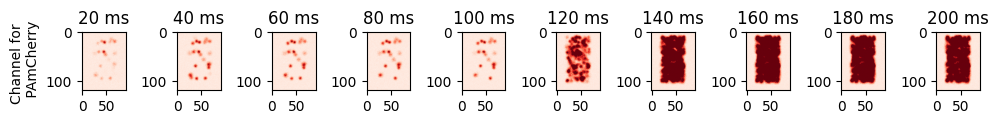

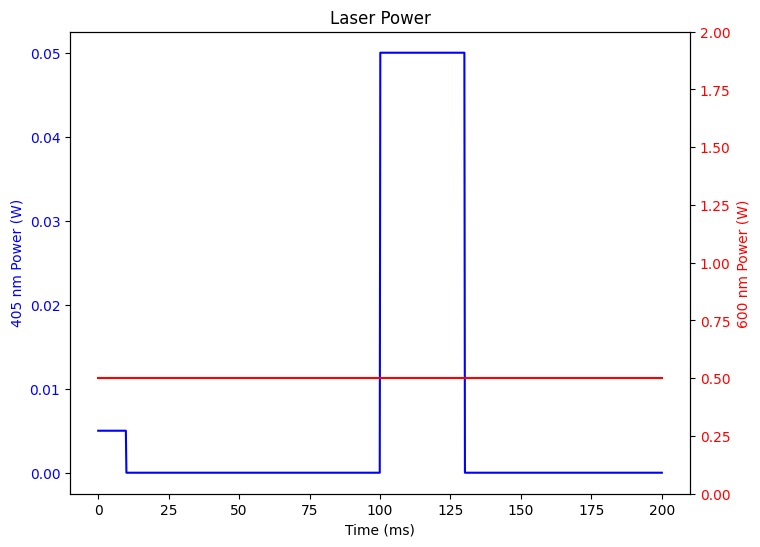

In [22]:
import matplotlib.pyplot as plt
import numpy as np
print(frames.shape)
num_channels = frames.shape[0]
time_frames = frames.shape[1]
channel_colors = ['Reds']
channel_fluorophores = ['PAmCherry']
fig, axes = plt.subplots(num_channels, time_frames, figsize=(10, 6))
# normalization from the first frame
norm_frames_maxg = [np.max(frames[i, 0,:]) for i in range(num_channels)]
norm_frames_ming = [np.min(frames[i, 0,:]) for i in range(num_channels)]

power405_time = [lpb(i) for i in np.linspace(0,total_duration*1e-3,1000)]

i = 0
for j in range(time_frames):
    axes[j].imshow(frames[i, j][35:-35, 40:-60], cmap=channel_colors[i], vmin=norm_frames_ming[i], vmax=norm_frames_maxg[i])
    axes[j].set_title(f'{(j+1)*20} ms')
axes[0].set_ylabel(f'Channel for \n {channel_fluorophores[i]}')
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
ax1.plot(np.linspace(0,total_duration,1000), power405_time, color='blue')
ax2.plot(np.linspace(0,total_duration,1000), [0.5]*1000, color='red')
ax1.set_xlabel('Time (ms)')
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylabel('405 nm Power (W)', color="blue")
ax2.set_ylabel('600 nm Power (W)', color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(0, 2)
ax1.set_title('Laser Power')
plt.show()

## Make a sinusoidal "pulse" for the 405 nm laser with a 200 ms period

In [23]:
# define a function for the laser power of blue
def lpb(t):
    # t is in s
    return 0.0005 + 0.0005 * np.sin(2. * (np.pi/0.2) * t)

In [24]:
# reset the microscope
vm.reset_to_initial_config()

True

In [25]:
total_duration = 200
frames, metadata = vm.run_sim(
    z_val=0.0,
    laser_power={"red": 0.5, "blue": lpb},
    laser_position={"red": (5, 5,0), "blue": (5, 5,0)},
    xyoffset=[0,0],
    duration_total=total_duration,
    exposure_time=20,
    interval_time=0,
)

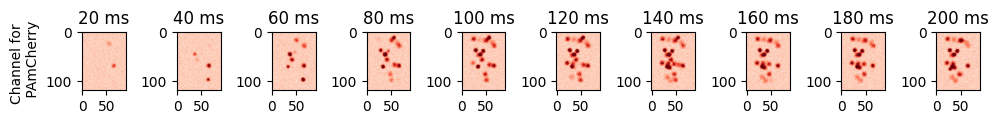

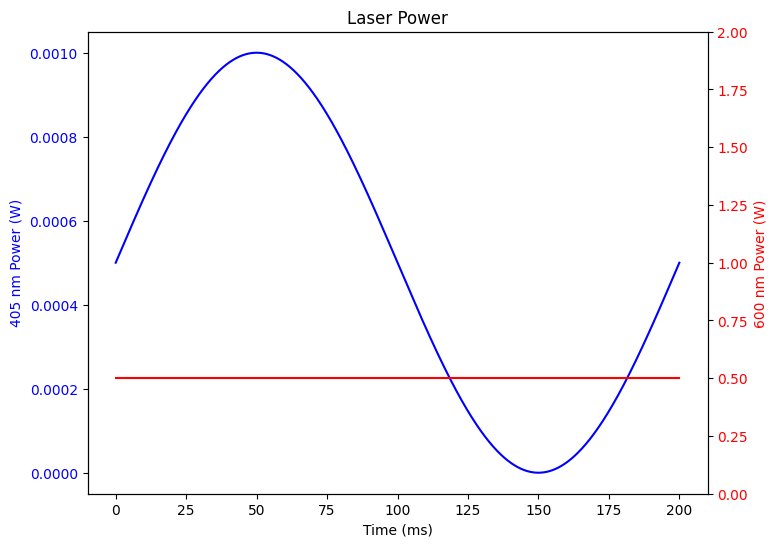

In [26]:
num_channels = frames.shape[0]
time_frames = frames.shape[1]
channel_colors = ['Reds']
channel_fluorophores = ['PAmCherry']
fig, axes = plt.subplots(num_channels, time_frames, figsize=(10, 6))
# normalization from the first frame
norm_frames_maxg = [np.max(frames[i, 0,:]) for i in range(num_channels)]
norm_frames_ming = [np.min(frames[i, 0,:]) for i in range(num_channels)]

power405_time = [lpb(i) for i in np.linspace(0,total_duration*1e-3,1000)]

i = 0
for j in range(time_frames):
    axes[j].imshow(frames[i, j][35:-35, 40:-60], cmap=channel_colors[i], vmin=norm_frames_ming[i], vmax=norm_frames_maxg[i])
    axes[j].set_title(f'{(j+1)*20} ms')
axes[0].set_ylabel(f'Channel for \n {channel_fluorophores[i]}')
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
ax1.plot(np.linspace(0,total_duration,1000), power405_time, color='blue')
ax2.plot(np.linspace(0,total_duration,1000), [0.5]*1000, color='red')
ax1.set_xlabel('Time (ms)')
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylabel('405 nm Power (W)', color="blue")
ax2.set_ylabel('600 nm Power (W)', color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(0, 2)
ax1.set_title('Laser Power')
plt.show()


## The excitation laser power can be changed to a high value to quickly bleach the newly converted molecules such that a molecule does not emit photons for multiple frames.

In [27]:
# reset the microscope
vm.reset_to_initial_config()

True

> Change the red laser power from 0.5W (continuous) to 50W (continuous)

In [28]:
total_duration = 200
frames, metadata = vm.run_sim(
    z_val=0.0,
    laser_power={"red": 50, "blue": lpb},
    laser_position={"red": (5, 5,0), "blue": (5, 5,0)},
    xyoffset=[0,0],
    duration_total=total_duration,
    exposure_time=20,
    interval_time=0,
)

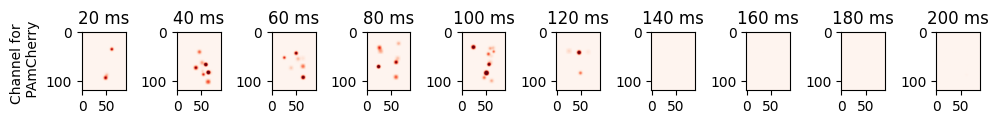

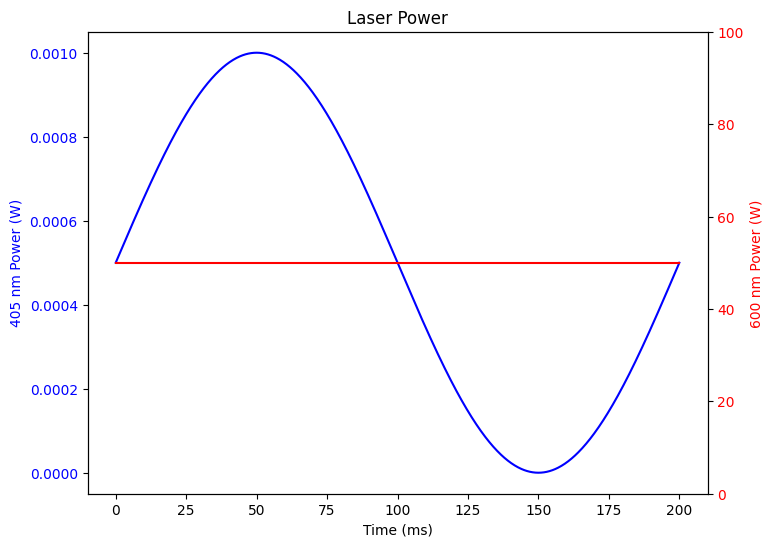

In [29]:
num_channels = frames.shape[0]
time_frames = frames.shape[1]
channel_colors = ['Reds']
channel_fluorophores = ['PAmCherry']
fig, axes = plt.subplots(num_channels, time_frames, figsize=(10, 6))
# normalization from the first frame
norm_frames_maxg = [np.max(frames[i, 0,:]) for i in range(num_channels)]
norm_frames_ming = [np.min(frames[i, 0,:]) for i in range(num_channels)]

power405_time = [lpb(i) for i in np.linspace(0,total_duration*1e-3,1000)]

i = 0
for j in range(time_frames):
    axes[j].imshow(frames[i, j][35:-35, 40:-60], cmap=channel_colors[i], vmin=norm_frames_ming[i], vmax=norm_frames_maxg[i])
    axes[j].set_title(f'{(j+1)*20} ms')
axes[0].set_ylabel(f'Channel for \n {channel_fluorophores[i]}')
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()
ax1.plot(np.linspace(0,total_duration,1000), power405_time, color='blue')
ax2.plot(np.linspace(0,total_duration,1000), [50]*1000, color='red')
ax1.set_xlabel('Time (ms)')
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylabel('405 nm Power (W)', color="blue")
ax2.set_ylabel('600 nm Power (W)', color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(0, 100)
ax1.set_title('Laser Power')
plt.show()

# In this notebook we only modulated one active laser. But due to composability of the simulation package we can extend this to any other defined lasers.